<center>
<h1> PyLadies Data Analytics Workshop</h1>
<h3>April 11, 2015 @ <a href="http://hackerspace.sg">HSG</a></h3>
<h3>Ivan &lt;vanzaj@gmail.com&gt;</h3>
</center>

- - - -

# Plan

1. Introduction & Setup
1. NumPy arrays
1. Plots
1. Data generation
1. Pandas

# Data Science

- Computer Science
    - engineering (storage, file systems, databases, ...)
    - algorithmic (signal processing, machine learning, optimization)
- Mathematics
    - numerical analysis
    - statistics
    - abstract complex systems
- Linguistics
    - natural language processing
- Geology and Meteorology
    - natural complex systems
- Economics
    - operations research
    - human complex systems
- Marketing
    - trends and sentiment analysis
- ...

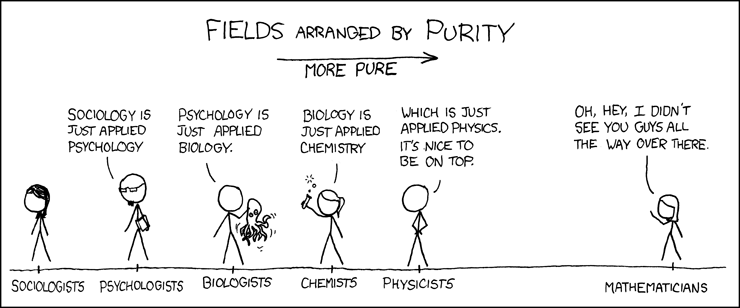

In [25]:
from IPython.display import HTML, Image

Image('http://imgs.xkcd.com/comics/purity.png')
# data scientists are off limits (not sure which side though)

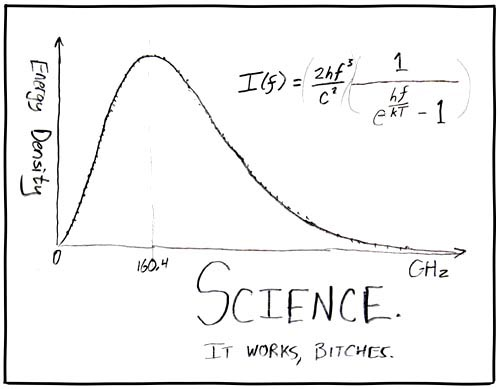

In [1]:
Image('http://imgs.xkcd.com/comics/science.jpg')
# http://www.explainxkcd.com/wiki/index.php?title=54:_Science 

## Brest cancer stats

<table>
<tr><td></td><td>Cancer (1%)</td><td>No cancer (99%)</td></tr>
<tr><td>Test +</td><td>80%</td><td>10%</td></tr>
<tr><td>Test -</td><td>20%</td><td>90%</td></tr>
</table>

What are the chances of actual cancer in case of a positive mammo test?

In [26]:
ir  = 1./100   # incidence rate
ptp = 8./10    # prob of true postitive test (sensitivity)
ptn = 9./10    # prob of true negative test (specificity)

odds = (ir * ptp) / ( ir * ptp + (1-ir) * (1-ptn))
print("Actual odds: %.2f%%" % (odds * 100))

Actual odds: 7.48%


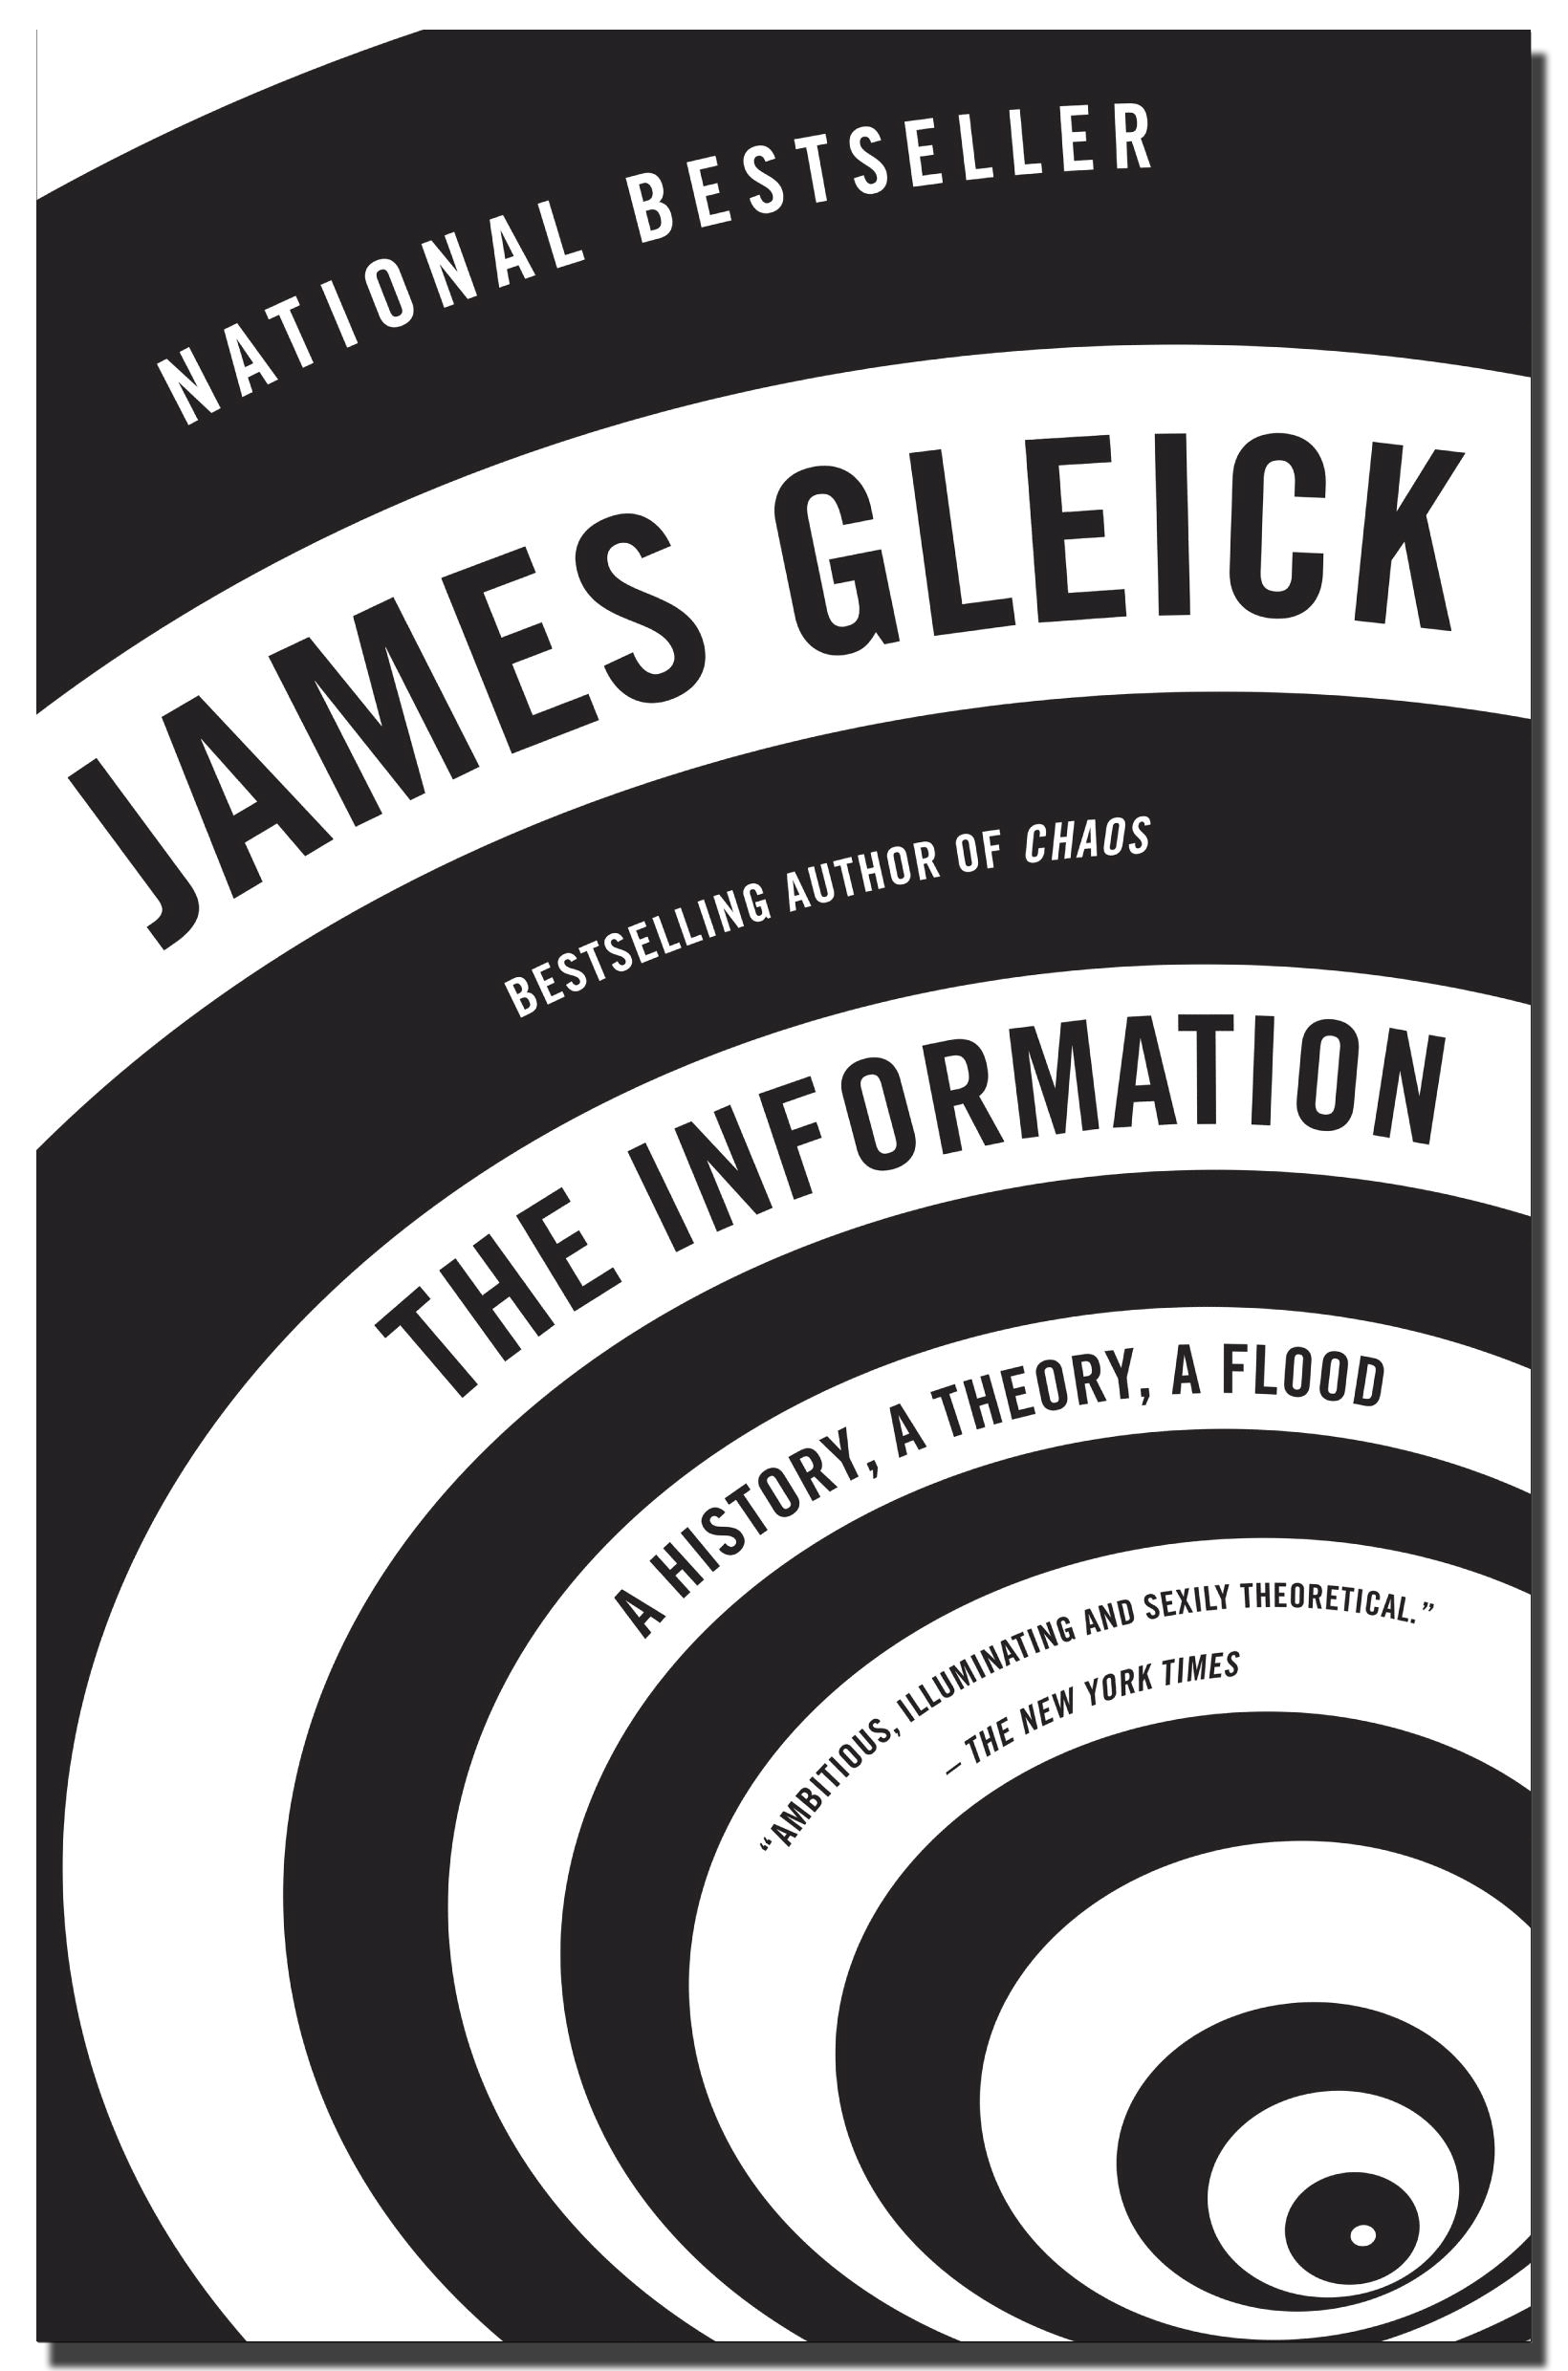

In [12]:
Image('http://around.com/wordpress/wp-content/uploads/US-paperback2.jpg', width=400)

In [36]:
url = 'http://www.ed.ac.uk/schools-departments/informatics/'
HTML('<iframe src="%s" width=800 height=400></iframe>' % url)

# Why use Python for analytics?


> 99% of "BigData" problems can be solved on a desktop.

- `import this`
- scipy stack (numpy, scipy, pandas, scikit-learn, mpl)
- ipython notebook

# Setup

## Linux

- you should know what you're doing with apt-get and yum et al.


## OSX

(how I do it)

- use brew
- use virtualenv / virtualenvwrapper / pyenv
   - possible to `pip install scipy` (but it takes some time to download and compile all dependencies)
- use anaconda or miniconda
   - default anaconda installation will change your `$PATH` (in `.bashrc`)

## Windows

(sorry, no experience)

- use anaconda


<div style="background: #f88; padding: 2em; margin-top: 2em">
<center><span style='font-size: 200%; color: white'>use ipython notebook !</span></center>
</div>

In [37]:
url = 'http://en.m.wikipedia.org/wiki/Literate_programming'
HTML('<iframe src="%s" width=800 height=400></iframe>' % url)

In [38]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Plotting in 1min

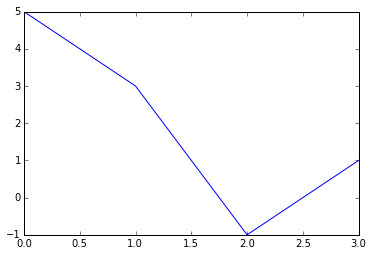

In [46]:
data = [5, 3, -1, 1]
plt.plot(data)

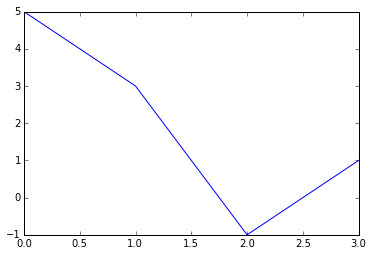

In [48]:
x = [0, 1, 2, 3]
y = [5, 3, -1, 1]

plt.plot(x, y)

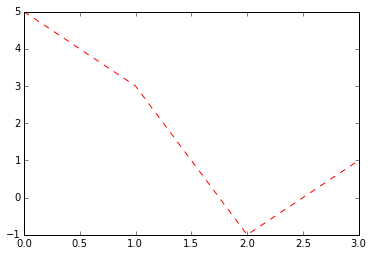

In [50]:
x = [0, 1, 2, 3]
y = [5, 3, -1, 1]

plt.plot(x, y, 'r--')

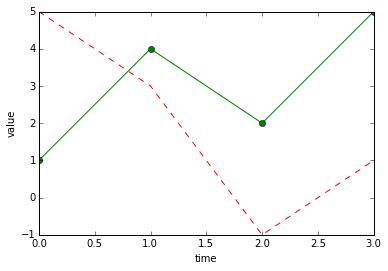

In [57]:
x  = [0, 1, 2, 3]
y1 = [5, 3, -1, 1]
y2 = [1, 4, 2, 5]

plt.plot(x, y1, 'r--', x, y2, 'go-')
plt.xlabel('time')
plt.ylabel('value')

# NumPy

- list vs array
- subscripts
- array oriented programming

## list vs array

In [68]:
x = range(10)
print x

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [69]:
print x*2 

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [72]:
print [1, '2', 'ouch'] * 2

[1, '2', 'ouch', 1, '2', 'ouch']


In [60]:
x = np.array(range(10))
print(x)

[0 1 2 3 4 5 6 7 8 9]


In [61]:
print( x * 2 )

[ 0  2  4  6  8 10 12 14 16 18]


In [62]:
print( 2*x + 5 )

[ 5  7  9 11 13 15 17 19 21 23]


In [66]:
print np.arange(-2, 3)

[-2 -1  0  1  2]


## math notation vs programming
---
plot 

$f(x) = -3x^2 + 2x -5$ for $x \in [-1, 3)$

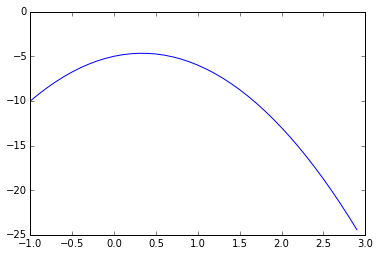

In [65]:
x = np.arange(-1, 3, 0.1)

y = -3 * x**2 + 2*x -5

plt.plot(x, y)

# External data

(based on [SW Carpentry python lesson](http://swcarpentry.github.io/python-novice-inflammation/))

> * We are studying inflammation in patients who have been given a new treatment for arthritis.
* The data sets are stored in comma-separated values (CSV) format: each row holds information for a single patient, and the columns represent successive days

In [74]:
! head -5 data/inflammation-01.csv

0,0,1,3,1,2,4,7,8,3,3,3,10,5,7,4,7,7,12,18,6,13,11,11,7,7,4,6,8,8,4,4,5,7,3,4,2,3,0,0
0,1,2,1,2,1,3,2,2,6,10,11,5,9,4,4,7,16,8,6,18,4,12,5,12,7,11,5,11,3,3,5,4,4,5,5,1,1,0,1
0,1,1,3,3,2,6,2,5,9,5,7,4,5,4,15,5,11,9,10,19,14,12,17,7,12,11,7,4,2,10,5,4,2,2,3,2,2,1,1
0,0,2,0,4,2,2,1,6,7,10,7,9,13,8,8,15,10,10,7,17,4,4,7,6,15,6,4,9,11,3,5,6,3,3,4,2,3,2,1
0,1,1,3,3,1,3,5,2,4,4,7,6,5,3,10,8,10,6,17,9,14,9,7,13,9,12,6,7,7,9,6,3,2,2,4,2,0,1,1


In [85]:
data = np.loadtxt(fname='data/inflammation-01.csv', delimiter=',')
print data

[[ 0.  0.  1. ...,  3.  0.  0.]
 [ 0.  1.  2. ...,  1.  0.  1.]
 [ 0.  1.  1. ...,  2.  1.  1.]
 ..., 
 [ 0.  1.  1. ...,  1.  1.  1.]
 [ 0.  0.  0. ...,  0.  2.  0.]
 [ 0.  0.  1. ...,  1.  1.  0.]]


In [82]:
print 'type:', type(data)
print 'lenght:', len(data)
print 'shape:', data.shape
print 'size:', data.size

type: <type 'numpy.ndarray'>
lenght: 60
shape: (60, 40)
size: 2400


In [96]:
# subscripts

print data[1][2], data[-1][-1]  # standard python
print data[1, 2], data[-1, -1]  # numpy

2.0 0.0
2.0 0.0


In [106]:
# slicing

# look at the first 5 patients from day 8 for 5 days

print data[0:5, 7:7+5]

[[  7.   8.   3.   3.   3.]
 [  2.   2.   6.  10.  11.]
 [  2.   5.   9.   5.   7.]
 [  1.   6.   7.  10.   7.]
 [  5.   2.   4.   4.   7.]]


# NumPy functions

In [112]:
print 'min/max:', np.min(data), np.max(data)

data.min(), data.max()


min/max: 0.0 20.0
0.0 20.0


In [119]:
# standard python
z = [2, 3, -4, 11]
print 'single list:', min(z)

z = [ [ 1,2], [-1, 3], [10,0] ]
print 'double list:', min(z)

single list: -4
double list: [-1, 3]


In [131]:
print 'patient5 mean(std): %.2f (%.2f) ' % ( data[4].mean(), data[4].std() )

a_day = data[:, 10]
print 'day10    mean(std): %.2f (%.2f) ' % ( a_day.mean(), a_day.std() )

patient5 mean(std): 5.55 (4.06) 
day10    mean(std): 5.95 (2.74) 


In [155]:
for day in range(5, 10):
    print 'mean for day %d: %.2f' %(day, np.mean(data[:, day]))

mean for day 5: 3.15
mean for day 6: 3.80
mean for day 7: 3.88
mean for day 8: 5.23
mean for day 9: 5.52


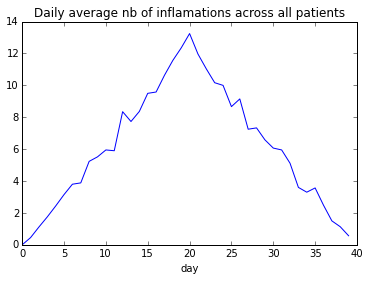

In [153]:
plt.plot( data.mean(axis=0) )

plt.xlabel('day')
plt.title('Daily average nb of inflamations across all patients')

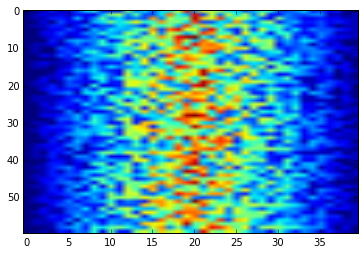

In [148]:
plt.figure(figsize=(6,4))
plt.imshow(data, aspect='auto')

In [35]:
# http://jeremykun.com/2012/01/01/random-psychedelic-art/
# http://www.slideshare.net/hexdump42/seeing-with-pythonpycon-sg2014